# Machine Learning Ops Case Study

This Notebook should have all the answers required.
I will be including code and answers in markdown cells and in-line comments for some part.

Note: I am using CLI and SDK for all action I perform, So I included additional code to show expected results instead of screenshots.

## Setting up the environment
The setup consists of two parts:
- Local Development environment using conda
- AWS (account, IAM user, S3, Sagemaker resources)

## Data Processing & Model Exploration
Packages used:
- pandas
- numpy
- python 3.12
- matplot
- seaborn
- xgboost
- sklearn

### Loading data and intial EDA
In this section I loaded the data which represent historical data for transactions identified as fraud or non-fraud using binary 1 or 0 'Class' column.
The dataset require some work to solve these issues:
- removing null values (ignoring the correlation between columns).
- balacing the data since the minority is fraudelent data.

In [371]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [372]:
# loading data into a pandas dataframe
data_source = '../data/financial_fraud.csv'
df = pd.read_csv(data_source)

In [373]:
#  reading dataset
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.059663,-0.389790,0.619460,-0.401747,0.140408,0.044106,0.437610,-0.182929,0.609347,0.578219,...,-0.223024,-0.822861,0.054543,-0.221428,0.340502,0.299070,-0.278195,-0.066949,18350.99,0
1,1.185201,-0.632161,0.507347,-0.887614,-0.069023,-0.211981,0.316608,-0.201578,0.186763,0.896861,...,-0.049555,0.317525,-0.171600,0.877552,1.172317,-0.126833,-0.258122,-0.097628,11741.12,0
2,-0.294450,-0.343103,2.636968,0.020243,-0.190241,1.136060,0.159043,0.069876,1.303589,0.360826,...,-0.061339,0.667540,-0.500019,-0.091960,0.728922,0.288978,0.065387,-0.126222,10678.90,0
3,1.008758,-0.371089,0.336378,-0.280149,0.451093,0.411290,0.566228,-0.204960,0.418702,0.576636,...,-0.107451,-0.094682,-0.364701,-1.581107,1.437732,-0.593228,-0.228128,-0.051419,4908.08,0
4,-0.207350,-0.269502,2.882598,-0.376418,0.328215,0.340967,0.474141,-0.124787,1.380252,0.129873,...,-0.064668,0.545575,-0.281799,1.282384,0.826799,-0.827908,-0.173036,0.084015,1549.61,0


In [374]:
df.shape

(22257, 30)

In [375]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [376]:
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [377]:
df.describe()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,22257.000000,22257.000000,22257.000000,22257.000000,22257.000000,22257.000000,22257.000000,22257.000000,22257.000000,22257.000000,...,22257.000000,22257.000000,22257.000000,22257.000000,22257.000000,22257.000000,22257.000000,22257.000000,20030.000000,22257.000000
mean,0.228536,-0.304700,0.907020,-0.463690,0.203012,0.390023,0.336567,-0.108981,0.859824,0.447833,...,-0.100836,-0.138005,-0.047139,0.115601,0.123699,-0.000931,-0.153357,-0.060929,11957.071072,0.112189
std,0.705621,0.700751,0.923192,0.788283,0.772570,0.825052,0.632154,0.537489,1.068488,0.773138,...,0.554827,0.682712,0.665448,1.078291,0.774437,1.142291,0.612398,0.680578,6919.513044,0.315606
min,-2.637662,-25.480046,-2.518308,-4.468314,-4.298320,-18.642598,-4.349095,-6.595785,-3.748125,-3.162937,...,-12.155836,-6.450353,-19.297443,-3.938205,-10.230967,-3.733169,-5.536809,-8.923980,50.530000,0.000000
25%,-0.206653,-0.538233,0.481711,-0.907960,-0.038432,0.017608,0.208527,-0.190233,0.245941,0.271841,...,-0.205054,-0.532478,-0.207009,-0.585189,-0.331929,-0.790671,-0.314353,-0.128624,5937.542500,0.000000
50%,0.042602,-0.338302,0.912222,-0.441318,0.161171,0.337960,0.384699,-0.143033,0.768853,0.457832,...,-0.140365,-0.138586,-0.072485,0.132435,0.166705,-0.051346,-0.224585,-0.048984,11854.990000,0.000000
75%,0.947607,-0.108591,1.436704,-0.062088,0.388888,0.709276,0.582913,-0.070589,1.420629,0.668822,...,-0.058274,0.215599,0.058736,0.820252,0.582265,0.731009,-0.069559,0.130732,17962.925000,0.000000
max,1.827792,4.359827,4.440555,2.392367,41.540257,9.295606,37.922674,5.958040,12.171681,13.573169,...,8.087080,9.762233,18.418155,9.978778,10.424231,5.623285,17.987212,11.375357,24039.880000,1.000000


In [378]:
# check the existence of missing values
df.isnull().sum()


V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20          0
V21          0
V22          0
V23          0
V24          0
V25          0
V26          0
V27          0
V28          0
Amount    2227
Class        0
dtype: int64

In [379]:
# find rows that has missing values
df[df.isnull().any(axis=1)]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5,0.982247,-0.548121,1.098797,-0.918797,-0.060495,0.301995,0.216825,-0.150954,3.029228,0.091639,...,-0.154221,0.105708,-0.029982,0.123479,0.597130,-1.784385,-0.141034,-0.033065,NaN,0
10,0.899925,-0.252186,0.857919,0.429552,0.173598,0.414032,0.345796,-0.128151,1.160762,0.554694,...,-0.200571,-0.353390,-0.084733,0.755880,0.751717,0.045957,-0.257197,-0.031692,NaN,0
17,-0.015367,-0.168730,2.319072,-0.119593,0.221254,0.661916,0.412462,-0.090390,0.913891,0.435776,...,-0.044005,0.585409,-0.209686,0.349207,-0.376267,-0.462560,-0.088404,0.154567,NaN,0
27,-0.113233,-0.252639,2.467124,0.034633,-0.075856,1.357873,0.797341,-0.141142,1.755623,0.406337,...,-0.311572,-0.437888,0.038308,0.388385,-0.276094,-1.175630,0.003279,-0.354365,NaN,0
57,-0.736503,0.335120,0.087782,-1.855151,0.115399,0.243729,0.356942,0.028681,1.577021,1.940281,...,-0.215470,-0.407205,0.159346,-1.623540,0.397405,1.530817,-0.875968,-0.596607,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22203,-0.600772,-1.469850,2.258201,-1.192238,0.404397,0.081803,0.250282,-0.145768,1.165154,0.736779,...,-0.102154,0.838431,1.236149,-0.092672,1.532112,-0.232027,0.277553,-0.328976,NaN,0
22210,-0.130851,-0.632022,1.794863,-0.581647,-0.169914,0.728703,0.802725,-0.151533,1.771869,0.084687,...,-0.096455,-0.012058,0.940412,0.833439,-1.550239,1.537023,-0.212792,0.383168,NaN,0
22240,0.896212,-0.395570,0.750537,-0.098761,0.187397,0.494918,0.436941,-0.131045,0.473134,0.610208,...,-0.113112,0.064532,-0.089838,0.517179,0.943442,-0.827582,-0.196214,-0.073932,NaN,0
22250,0.056212,-0.268814,1.102507,-0.812988,0.730299,1.150743,0.609925,-0.100350,0.650617,0.562332,...,-0.148390,0.115451,-0.433291,-2.572881,-0.172657,0.979359,0.001587,-0.231361,NaN,0


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


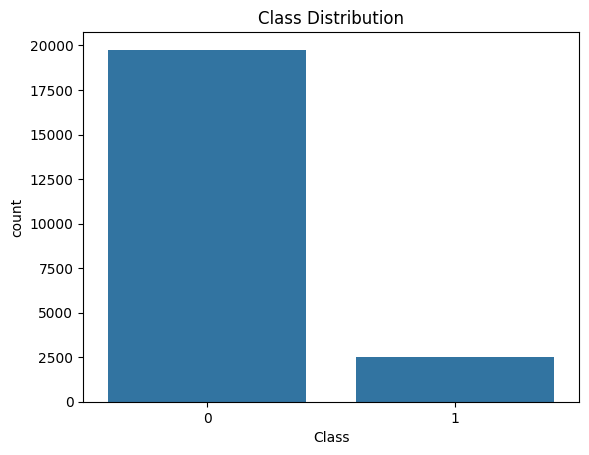

In [380]:
# see how data is distributed based on the class value
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

In [381]:
count_class_0 = df[df['Class'] == 0].shape[0]
print(f"Number of rows with Class 0 non_fraud_df: {count_class_0}")

count_class_1 = df[df['Class'] == 1].shape[0]
print(f"Number of rows with Class 1 fraud_df: {count_class_1}")



Number of rows with Class 0 non_fraud_df: 19760
Number of rows with Class 1 fraud_df: 2497


Note: As we saw above most of the transaction were classified as not fraudulent, which could cause bais.

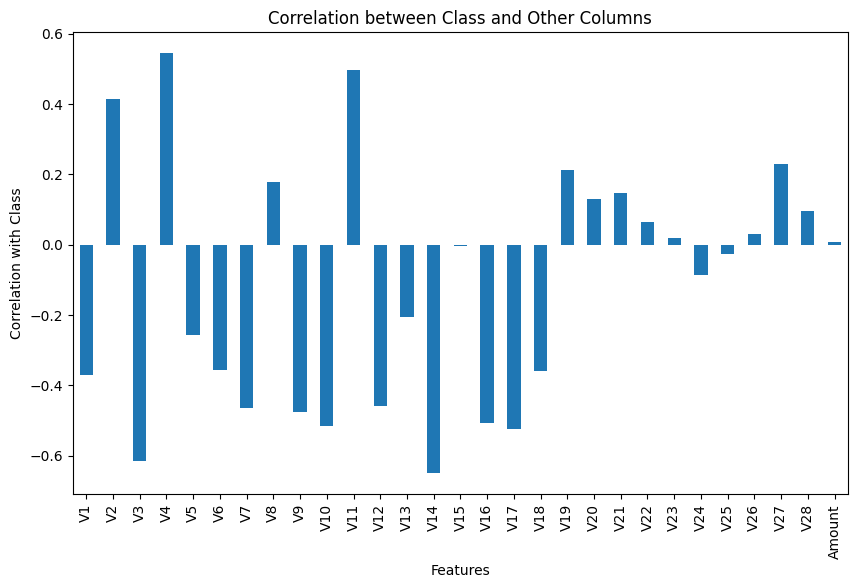

In [382]:
# Calculate the correlation between 'Class' and other columns
class_correlation = df.corr()['Class'].drop('Class')

# Plot the correlation values
plt.figure(figsize=(10, 6))
class_correlation.plot(kind='bar')
plt.title('Correlation between Class and Other Columns')
plt.xlabel('Features')
plt.ylabel('Correlation with Class')
plt.show()



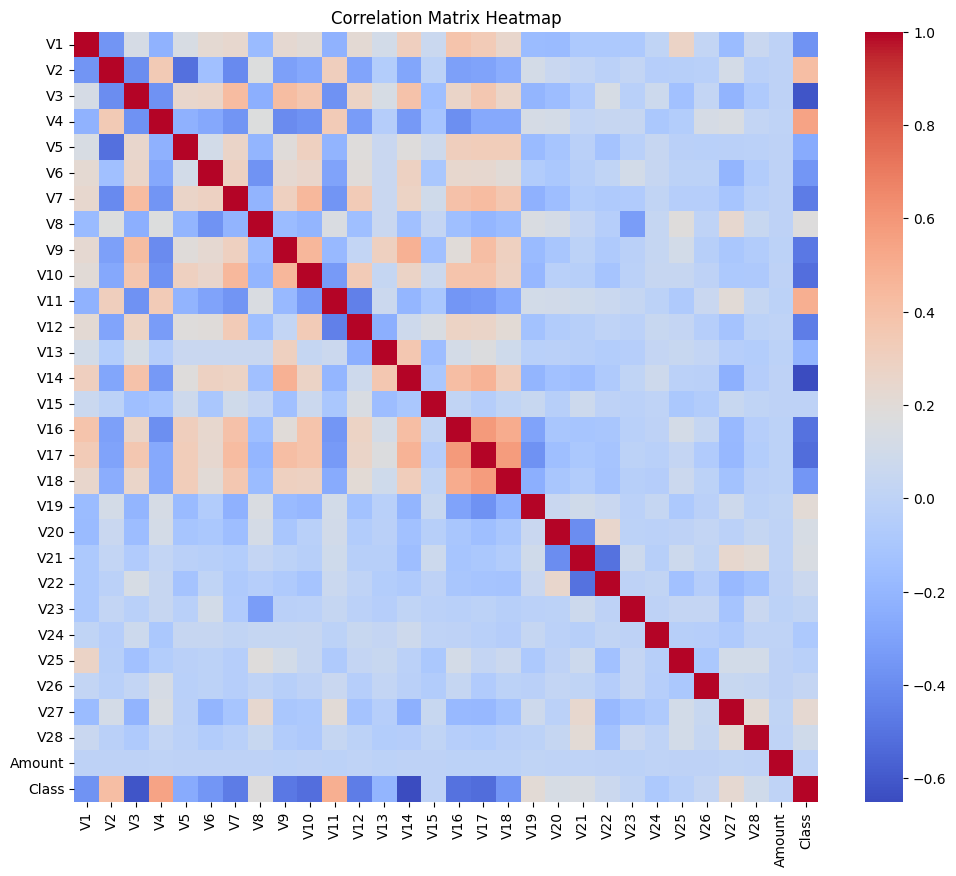

In [383]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

We can see not all columns has high impact on the targeted result, so I will drop them.

### Clean & prepare the dataset for classification.
Since we are looking to predict binary answer, I will use classification model.

#### Data cleaning

In [384]:
# Drop the null values
df = df.dropna()
df.isnull().sum().any()

False

In [385]:
# Get the columns with correlation value greater than or equal to 0.05
columns_to_keep = class_correlation[(class_correlation) >= 0.05].index

# Add the 'Class' column to the list of columns to keep
columns_to_keep = columns_to_keep.append(pd.Index(['Class']))

# Drop the columns with correlation value less than 0.1
df = df[columns_to_keep]


#### Data balancing

In [386]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.Class == 0]
df_minority = df[df.Class == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=df_minority.shape[0],     # to match minority class
                                   ) # reproducible results

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(df_balanced.Class.value_counts())


Class
0    2241
1    2241
Name: count, dtype: int64


In [393]:
df.head()

,V2,V4,V8,V11,V19,V20,V21,V22,V27,V28,Class
0,-0.389790,-0.401747,-0.182929,-1.168428,-0.153233,-0.273510,-0.223024,-0.822861,-0.278195,-0.066949,0
1,-0.632161,-0.887614,-0.201578,-1.117436,0.461179,-0.204630,-0.049555,0.317525,-0.258122,-0.097628,0
2,-0.343103,0.020243,0.069876,-2.570895,0.901964,-0.083697,-0.061339,0.667540,0.065387,-0.126222,0
3,-0.371089,-0.280149,-0.204960,-1.736493,-0.105631,-0.044656,-0.107451,-0.094682,-0.228128,-0.051419,0
4,-0.269502,-0.376418,-0.124787,-0.219251,-1.597308,-0.217927,-0.064668,0.545575,-0.173036,0.084015,0


In [387]:
# Splitting the data into training and testing sets with 95% of the data for training and 5% for testing
from sklearn.model_selection import train_test_split
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

### Training (Locally using xgboost)

In [388]:
# prepare XGBoost classifer model with learing rate, number of trees 300, max depth of 5, minimun child weight 1, and gamma 0
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1, n_estimators=300, max_depth=5, min_child_weight=1, gamma=0)

In [389]:
# let's train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [332]:
model.predict(X_test).tolist()

[0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1]

In [390]:
# let's score the model on test data
from sklearn.metrics import accuracy_score
pred_test = model.predict(X_test)
test_score = accuracy_score(pred_test, y_test)
print("Test score:", np.round(test_score,2))


Test score: 0.94


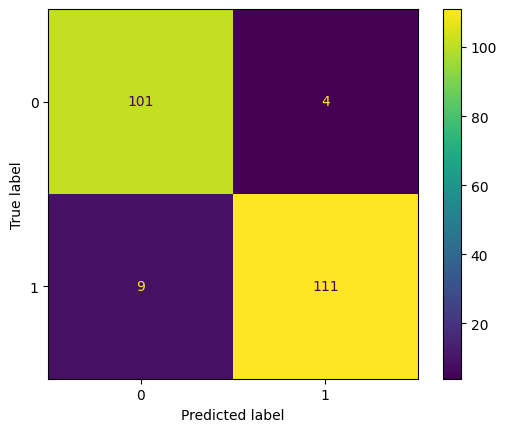

In [391]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# let's see the confusion matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, pred_test)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Note: As we see the number of False Negative (FN) and False Positive (FP) are low comparing to True Positive (TP) and True Negative (TN).
This indicate the model is perfoming well; However, we can't count on this due the number of data after shrinking the non-fraudulent data.

In [392]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       105
           1       0.97      0.93      0.94       120

    accuracy                           0.94       225
   macro avg       0.94      0.94      0.94       225
weighted avg       0.94      0.94      0.94       225



## Cloud Integration - AWS SageMaker
This section show my ablity to utilize cloud service to train xgboost model on SageMake.
I have create an AWS root account, IAM user, S3 bucket, SageMaker resources and some roles.

### Uploading cleaned data to s3 bucket

#### Creating S3 bucket
Usually, I prefer using provisioning tools such as terraform to initialize any type of IaaS service (buckets, role, useraccounts...).
However, here I am using IAM user which permited to create S3 bucket for simplicity purpose.

In [430]:
import boto3

# Initialize a session using Amazon S3 using aws sdk boto3, and create a bucket
s3 = boto3.client('s3')
iam = boto3.client('iam')
# Create a bucket
bucket_name = f'my-mlops-{iam.get_user()['User']['UserName']}'
region = 'us-east-2'

try:
    response = s3.create_bucket(
        Bucket=bucket_name,
        CreateBucketConfiguration={
            'LocationConstraint': region
        }
    )
    print(f'Bucket {bucket_name} created successfully')
except Exception as e:
    print(f'Error creating bucket: {e}')

Error creating bucket: An error occurred (BucketAlreadyOwnedByYou) when calling the CreateBucket operation: Your previous request to create the named bucket succeeded and you already own it.


#### Creating IAM Role

In [431]:
import boto3

# Initialize a session using Amazon IAM
iam = boto3.client('iam')

# Define the trust policy for the role
trust_policy = {
    "Version": "2012-10-17",
    "Statement": [
        {
            "Effect": "Allow",
            "Principal": {
                "Service": "sagemaker.amazonaws.com"
            },
            "Action": "sts:AssumeRole"
        }
    ]
}

# Create the role
role_name = 'SageMakerExecutionRole-mlops'
try:
    create_role_response = iam.create_role(
        RoleName=role_name,
        AssumeRolePolicyDocument=json.dumps(trust_policy),
        Description='Role to allow SageMaker to access AWS services'
    )
    print(f'Role {role_name} created successfully')
except Exception as e:
    print(f'Error creating role: {e}')

# Attach the AmazonSageMakerFullAccess policy to the role
policy_arn = 'arn:aws:iam::aws:policy/AmazonSageMakerFullAccess'
try:
    attach_policy_response = iam.attach_role_policy(
        RoleName=role_name,
        PolicyArn=policy_arn
    )
    print(f'Policy {policy_arn} attached successfully to role {role_name}')
except Exception as e:
    print(f'Error attaching policy: {e}')
    

Error creating role: An error occurred (EntityAlreadyExists) when calling the CreateRole operation: Role with name SageMakerExecutionRole-mlops already exists.
Policy arn:aws:iam::aws:policy/AmazonSageMakerFullAccess attached successfully to role SageMakerExecutionRole-mlops


In [432]:
# get the role ARN
role = iam.get_role(RoleName=role_name)
role_arn = role['Role']['Arn']
print(role_arn)

arn:aws:iam::975050104128:role/SageMakerExecutionRole-mlops


### Using SageMaker

In [419]:
import sagemaker
from sagemaker.inputs import TrainingInput

# Step 1: Set up SageMaker session and role
sagemaker_session = sagemaker.Session()

print('Using bucket ' + bucket_name)
print('Using region ' + region)
print('Using role_arn ' + role_arn)

Using bucket my-mlops-sagemakeruser
Using region us-east-2
Using role_arn arn:aws:iam::975050104128:role/SageMakerExecutionRole-mlops


In [420]:
# Prepare data to S3
# we will use the same data we used above train and test data
# X_train, X_test, y_train, y_test

# Convert data to CSV format and save locally
train_data = pd.concat([pd.DataFrame(y_train), pd.DataFrame(X_train)], axis=1)
test_data = pd.concat([pd.DataFrame(y_test), pd.DataFrame(X_test)], axis=1)

train_data.to_csv('train.csv', index=False, header=False)
test_data.to_csv('test.csv', index=False, header=False)

In [421]:
# Upload data to S3
train_s3_path = sagemaker_session.upload_data('train.csv',bucket=bucket_name, key_prefix='xgboost/train')
test_s3_path = sagemaker_session.upload_data('test.csv',bucket=bucket_name, key_prefix='xgboost/test')

In [423]:
print(train_s3_path)
print(test_s3_path)

s3://my-mlops-sagemakeruser/xgboost/train/train.csv
s3://my-mlops-sagemakeruser/xgboost/test/test.csv


#### Model preparation

In [424]:
# Here, I will use the XGBoost built-in algorithm container instead of a training script
container = sagemaker.image_uris.retrieve("xgboost", sagemaker_session.boto_region_name, "1.3-1")
display(container)

INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


'257758044811.dkr.ecr.us-east-2.amazonaws.com/sagemaker-xgboost:1.3-1'

In [428]:

# Create and configure XGBoost estimator
xgb = sagemaker.estimator.Estimator(
    container,
    role=role_arn,
    instance_count=1,
    instance_type='ml.m5.xlarge',
    output_path="s3://{}/output".format(bucket_name),
    sagemaker_session=sagemaker_session
)
xgb.set_hyperparameters(
    eta=0.1,
    num_round=300,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    objective="binary:logistic",
    reg_lambda=1  # L2 regularization term
)


Note: reg_lambda is to use L2 regularization.
I don't know the differance honestly.

In [429]:
# Train the model
xgb.fit({'train': TrainingInput(s3_data=train_s3_path, content_type='csv')})

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-10-26-19-31-00-324


2024-10-26 19:31:02 Starting - Starting the training job...
2024-10-26 19:31:38 Downloading - Downloading input data...
2024-10-26 19:31:58 Downloading - Downloading the training image...
2024-10-26 19:32:49 Training - Training image download completed. Training in progress.
2024-10-26 19:32:49 Uploading - Uploading generated training model[2024-10-26 19:32:44.200 ip-10-0-81-32.us-east-2.compute.internal:7 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2024-10-26 19:32:44.223 ip-10-0-81-32.us-east-2.compute.internal:7 INFO profiler_config_parser.py:111] User has disabled profiler.
[2024-10-26:19:32:44:INFO] Imported framework sagemaker_xgboost_container.training
[2024-10-26:19:32:44:INFO] Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
[2024-10-26:19:32:44:INFO] No GPUs detected (normal if no gpus installed)
[2024-10-26:19:32:44:INFO] Running XGBoost Sagemaker in algorithm mode
[2024-10-26:19:32:44:INFO] Determined delimiter of

## MLOps Implementation

### Usage

#### Deploying The model

In [433]:
# Step 5: Deploy the model
xgb_predictor = xgb.deploy(
    initial_instance_count=1,
    instance_type='ml.m5.xlarge'
)


INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-10-26-19-35-33-344
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2024-10-26-19-35-33-344
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2024-10-26-19-35-33-344


-----!

#### Calling Endpoint using Python request

In [434]:
import requests
from requests_aws4auth import AWS4Auth
import boto3
from io import StringIO


# AWS credentials
session = boto3.Session()
credentials = session.get_credentials()
region = 'us-east-2'  # Replace with your region

# AWS4Auth
auth = AWS4Auth(credentials.access_key, credentials.secret_key, region, 'sagemaker', session_token=credentials.token)

# Endpoint URL
endpoint_name = xgb_predictor.endpoint
endpoint_url = f'https://runtime.sagemaker.{region}.amazonaws.com/endpoints/{endpoint_name}/invocations'

# Input data

csv_buffer = StringIO()
X_test[3:4].to_csv(csv_buffer, index=False, header=False)

# Convert the input data to JSON
payload = csv_buffer.getvalue()

# Make the API call
response = requests.post(endpoint_url, data=payload, headers={'Content-Type': 'text/csv'}, auth=auth)

# Parse the response
result = response.json()
print(result)

INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


0.999377429485321


#### Predict using test data

In [437]:
predictions = xgb_predictor.predict(X_test.to_csv(index=False, header=False), initial_args={'ContentType': 'text/csv'})

In [438]:
predictions.split()[0:5]

[b'0.5188320875167847',
 b'0.001738369232043624',
 b'0.10958411544561386',
 b'0.999377429485321',
 b'0.004520219285041094']

#### Uploading result to S3 bucket

In [471]:
# Define the file path
predictions_file_path = 'predictions_results.bin'

# Save the binary data to a file
with open(predictions_file_path, 'wb') as file:
    file.write(predictions)

print(f'Successfully saved binary data to {predictions_file_path}')
result_s3_path = sagemaker_session.upload_data(predictions_file_path,bucket=bucket_name, key_prefix='xgboost/result')
print(f'Successfully uploaded string to {result_s3_path}')


Successfully saved binary data to predictions_results.bin
Successfully uploaded string to s3://my-mlops-sagemakeruser/xgboost/result/predictions_results.bin


In [473]:
# print files s3 paths in the S3 bucket
print(f"Files in S3 bucket {bucket_name}:")
for obj in sagemaker_session.s3_client.list_objects(Bucket=bucket_name, Prefix='xgboost/result')['Contents']:
    print(obj['Key'])
for obj in sagemaker_session.s3_client.list_objects(Bucket=bucket_name, Prefix='xgboost/train')['Contents']:
    print(obj['Key'])
for obj in sagemaker_session.s3_client.list_objects(Bucket=bucket_name, Prefix='xgboost/test')['Contents']:
    print(obj['Key'])


Files in S3 bucket my-mlops-sagemakeruser:
xgboost/result/predictions_results.bin
xgboost/train/train.csv
xgboost/test/test.csv


In [367]:
# let score the sg model on test data
binary_predictions = [1 if float(pred) > 0.5 else 0 for pred in predictions.decode('utf-8').split()]
test_score = accuracy_score(binary_predictions, y_test)
print("Test score:", np.round(test_score,2))

Test score: 0.95


#### Versioning

In [474]:
# Enable versioning on the bucket
try:
    sagemaker_session.s3_client.put_bucket_versioning(
        Bucket=bucket_name,
        VersioningConfiguration={'Status': 'Enabled'}
    )
    print(f'Versioning enabled on bucket {bucket_name}.')
except sagemaker_session.ClientError as e:
    print(f'Error enabling versioning: {e}')

Versioning enabled on bucket my-mlops-sagemakeruser.


In [483]:
# uploading the training data to S3 bucket Again with versioning enabled
train_s3_path = sagemaker_session.upload_data('train.csv',bucket=bucket_name, key_prefix='xgboost/train')


In [484]:
# Train the model agian with latest data
xgb.fit({'train': TrainingInput(s3_data=train_s3_path, content_type='csv')})

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-10-26-20-41-18-596


2024-10-26 20:41:20 Starting - Starting the training job...
2024-10-26 20:41:53 Downloading - Downloading input data...
2024-10-26 20:42:13 Downloading - Downloading the training image...
2024-10-26 20:43:04 Training - Training image download completed. Training in progress.
2024-10-26 20:43:04 Uploading - Uploading generated training model[2024-10-26 20:42:58.405 ip-10-0-240-66.us-east-2.compute.internal:7 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2024-10-26 20:42:58.434 ip-10-0-240-66.us-east-2.compute.internal:7 INFO profiler_config_parser.py:111] User has disabled profiler.
[2024-10-26:20:42:58:INFO] Imported framework sagemaker_xgboost_container.training
[2024-10-26:20:42:58:INFO] Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
[2024-10-26:20:42:58:INFO] No GPUs detected (normal if no gpus installed)
[2024-10-26:20:42:58:INFO] Running XGBoost Sagemaker in algorithm mode
[2024-10-26:20:42:58:INFO] Determined delimiter 

In [482]:
# List versions of objects in the S3 bucket
try:
    response = sagemaker_session.s3_client.list_object_versions(Bucket=bucket_name, Prefix='xgboost/train')
    versions = response.get('Versions', [])
    for version in versions:
        print(f"Key: {version['Key']}, VersionId: {version['VersionId']}, IsLatest: {version['IsLatest']}, LastModified: {version['LastModified']}")
except Exception as e:
    print(f'Error listing object versions: {e}')

Key: xgboost/result/predictions_results.bin, VersionId: null, IsLatest: True, LastModified: 2024-10-26 20:21:06+00:00
Key: xgboost/test/test.csv, VersionId: null, IsLatest: True, LastModified: 2024-10-26 19:07:29+00:00
Key: xgboost/train/train.csv, VersionId: e.c4ze.2AALzgzdv3P7xjvPLFmrIxVDq, IsLatest: True, LastModified: 2024-10-26 20:33:54+00:00
Key: xgboost/train/train.csv, VersionId: CfE7_GqGzVlbLNsRBBImAgUsrMGA2k5B, IsLatest: False, LastModified: 2024-10-26 20:33:20+00:00
Key: xgboost/train/train.csv, VersionId: null, IsLatest: False, LastModified: 2024-10-26 19:07:21+00:00


In [487]:
# List models in SageMaker
try:
    response = sagemaker_session.sagemaker_client.list_models()
    models = response.get('Models', [])
    for model in models:
        print(f"Model Name: {model['ModelName']}, Creation Time: {model['CreationTime']}, Model ARN: {model['ModelArn']}")
except Exception as e:
    print(f'Error listing models: {e}')

Model Name: sagemaker-xgboost-2024-10-26-19-35-33-344, Creation Time: 2024-10-26 22:35:36.669000+03:00, Model ARN: arn:aws:sagemaker:us-east-2:975050104128:model/sagemaker-xgboost-2024-10-26-19-35-33-344
Model Name: sagemaker-xgboost-2024-10-25-22-41-13-687, Creation Time: 2024-10-26 01:41:20.986000+03:00, Model ARN: arn:aws:sagemaker:us-east-2:975050104128:model/sagemaker-xgboost-2024-10-25-22-41-13-687
Model Name: sagemaker-xgboost-2024-10-25-21-06-13-645, Creation Time: 2024-10-26 00:06:14.963000+03:00, Model ARN: arn:aws:sagemaker:us-east-2:975050104128:model/sagemaker-xgboost-2024-10-25-21-06-13-645
Model Name: sagemaker-xgboost-2024-10-25-18-28-24-459, Creation Time: 2024-10-25 21:28:26.295000+03:00, Model ARN: arn:aws:sagemaker:us-east-2:975050104128:model/sagemaker-xgboost-2024-10-25-18-28-24-459


# Deleting endpoint

In [488]:
xgb_predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: sagemaker-xgboost-2024-10-26-19-35-33-344
INFO:sagemaker:Deleting endpoint with name: sagemaker-xgboost-2024-10-26-19-35-33-344
